In [1]:
import pandas as pd

In [2]:
tweet = pd.read_csv("Sentiment.csv")

In [3]:
tweet.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [4]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
id                           13871 non-null int64
candidate                    13775 non-null object
candidate_confidence         13871 non-null float64
relevant_yn                  13871 non-null object
relevant_yn_confidence       13871 non-null float64
sentiment                    13871 non-null object
sentiment_confidence         13871 non-null float64
subject_matter               13545 non-null object
subject_matter_confidence    13871 non-null float64
candidate_gold               28 non-null object
name                         13871 non-null object
relevant_yn_gold             32 non-null object
retweet_count                13871 non-null int64
sentiment_gold               15 non-null object
subject_matter_gold          18 non-null object
text                         13871 non-null object
tweet_coord                  21 non-null object
tweet_created                13871 no

In [16]:
tweet.shape

(13871, 21)

In [18]:
tweet.isna().sum()

id                               0
candidate                       96
candidate_confidence             0
relevant_yn                      0
relevant_yn_confidence           0
sentiment                        0
sentiment_confidence             0
subject_matter                 326
subject_matter_confidence        0
candidate_gold               13843
name                             0
relevant_yn_gold             13839
retweet_count                    0
sentiment_gold               13856
subject_matter_gold          13853
text                             0
tweet_coord                  13850
tweet_created                    0
tweet_id                         0
tweet_location                3912
user_timezone                 4403
dtype: int64

In [15]:
for att in tweet.columns:
    
    print(tweet[att].value_counts())
    print('---------------------------')

2047     1
6790     1
12963    1
8865     1
10912    1
4759     1
6806     1
661      1
2708     1
12947    1
8849     1
10896    1
4743     1
645      1
10736    1
2692     1
12931    1
8833     1
10880    1
4727     1
6774     1
629      1
2676     1
12915    1
8817     1
10864    1
2724     1
677      1
6822     1
4775     1
        ..
11487    1
9438     1
5400     1
1306     1
11599    1
3355     1
9550     1
13644    1
3403     1
1354     1
7497     1
5448     1
11583    1
9534     1
13628    1
3387     1
1338     1
7481     1
5432     1
11567    1
9518     1
13612    1
3371     1
1322     1
7465     1
5416     1
11551    1
9502     1
13596    1
2049     1
Name: id, Length: 13871, dtype: int64
---------------------------
No candidate mentioned    7491
Donald Trump              2813
Jeb Bush                   705
Ted Cruz                   637
Ben Carson                 404
Mike Huckabee              393
Chris Christie             293
Marco Rubio                275
Rand Paul      

In [19]:
new_tweet_data = tweet[['text','sentiment','sentiment_confidence']]

In [20]:
new_tweet_data.head()

,text,sentiment,sentiment_confidence
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral,0.6578
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive,0.6333
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral,0.6629
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive,1.0000
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive,0.7045


In [55]:
new_tweet_data['text'].iloc[0]

'RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate'

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer

In [32]:
from nltk.tokenize import word_tokenize

In [33]:
token = word_tokenize(ss)

In [25]:
import re

In [52]:
def process_tweet(tweet_text):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z\t])",
                           " ",tweet_text.lower()).split())

In [53]:
new_tweet_data['clean']  = new_tweet_data['text'].apply(process_tweet)

C:\Users\user\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
new_tweet_data.head()

,text,sentiment,sentiment_confidence,clean
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral,0.6578,rt how did everyone feel about the climate cha...
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive,0.6333,rt didn t catch the full gopdebate last night ...
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral,0.6629,rt no mention of tamir rice and the gopdebate ...
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive,1.0000,rt that carly fiorina is trending hours after ...
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive,0.7045,rt gopdebate w delivered the highest ratings i...


In [61]:
def tweet_cleaning(tweet_text):
    tweet = tweet_text[3:].replace("gopdebate",' ')
    return tweet

In [62]:
new_tweet_data['clean_tweet']  = new_tweet_data['clean'].apply(tweet_cleaning)

C:\Users\user\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
new_tweet_data.head()

,text,sentiment,sentiment_confidence,clean,clean_tweet
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral,0.6578,rt how did everyone feel about the climate cha...,how did everyone feel about the climate change...
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive,0.6333,rt didn t catch the full gopdebate last night ...,didn t catch the full last night here are so...
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral,0.6629,rt no mention of tamir rice and the gopdebate ...,no mention of tamir rice and the was held in...
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive,1.0000,rt that carly fiorina is trending hours after ...,that carly fiorina is trending hours after her...
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive,0.7045,rt gopdebate w delivered the highest ratings i...,w delivered the highest ratings in the histo...


In [139]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
''.join(news for news in news_df['pre-processed news'][news_df['news_type']=='fake'])

In [134]:
positive_tweet = ''.join(tweet for tweet in new_tweet_data['clean_tweet'][new_tweet_data['sentiment']=='Positive'])  
negative_tweet = ''.join(tweet for tweet in new_tweet_data['clean_tweet'][new_tweet_data['sentiment']=='Negative'])
neutral_tweet = ''.join(tweet for tweet in new_tweet_data['clean_tweet'][new_tweet_data['sentiment']=='Neutral'])

In [135]:
positive_tweet

'didn t catch the full   last night here are some of scott s best lines in 90 seconds walker16 http t co zsffthat carly fiorina is trending hours after her debate above any of the men in just completed   says she s on  w delivered the highest ratings in the history of presidential debates trump2016 http t cotx on my first day i will rescind every illegal executive action taken by barack obama  just woke up to tweet this out   best line of the night via http t co 6ov5hxhicvi loved scott walker as mark harmon s romantic rival in summer school look it up  cruz has class amp truth that gets my vote  debate w delivered the highest ratings in the history of presidential debates trump2016 fox say thanksbig moments were vs and reaction to women question kellyfiljoin isis and sign your death warrant signed next president of the us   wakeupamerica cruzcrew httbefore the   14 focus groupers said they had favorable view of trump after only 3 saw him positively httpholly renee just made my first do

In [136]:
wordcloud = WordCloud(background_color='white',stopwords=STOPWORDS)

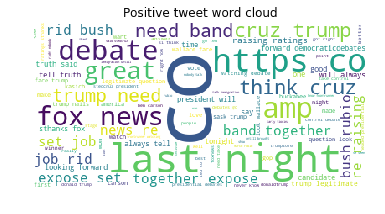

In [140]:
wc = wordcloud.generate(positive_tweet)
plt.figure(figsize=(6,4))
plt.axis('off')
plt.title('Positive tweet word cloud')
plt.imshow(wc)

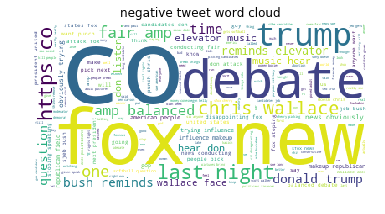

In [141]:
wc = wordcloud.generate(negative_tweet)
plt.figure(figsize=(6,4))
plt.axis('off')
plt.title('negative tweet word cloud')
plt.imshow(wc)

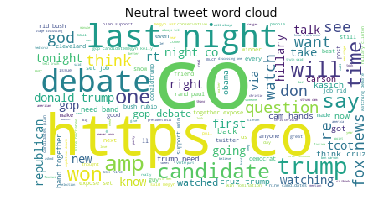

In [142]:
wc = wordcloud.generate(neutral_tweet)
plt.figure(figsize=(6,4))
plt.axis('off')
plt.title('Neutral tweet word cloud')
plt.imshow(wc)

In [156]:
import seaborn as sns

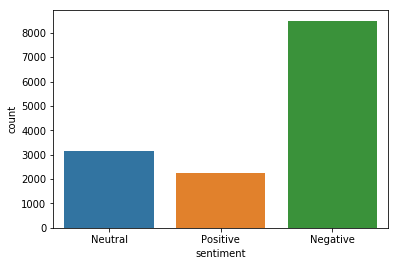

In [157]:
sns.countplot(x='sentiment',data=new_tweet_data)

# LABEL ENCODER

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
encoder = LabelEncoder()

In [68]:
y = pd.Series(encoder.fit_transform(new_tweet_data['sentiment']))

In [69]:
y.head()

0    1
1    2
2    1
3    2
4    2
dtype: int32

In [86]:
y.shape

(13871,)

In [64]:
from sklearn.model_selection import train_test_split

In [105]:
X_train,X_test,y_train,y_test = train_test_split(new_tweet_data['clean_tweet'] ,y,test_size=0.3,random_state=3)

In [106]:
X_train.shape

(9709,)

In [107]:
y_train.shape

(9709,)

In [108]:
X_test.shape

(4162,)

In [109]:
y_test.shape

(4162,)

# FEATURE EXTRACTION

In [71]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [110]:
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [113]:
X_train_count = count_vect.fit_transform(X_train)
X_test_count = count_vect.transform(X_test)

In [114]:
X_train_tfidf = transformer.fit_transform(X_train_count)
X_test_tfidf = transformer.transform(X_test_count)

# BUILDING MODEL

In [81]:
from sklearn.svm import SVC

In [115]:
svc_cls = SVC()

In [116]:
svc_cls.fit(X_train_tfidf,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [117]:
svc_sentiment = svc_cls.predict(X_test_tfidf)

In [118]:
print(svc_pred)

[0 0 0 ... 0 0 0]


In [98]:
from sklearn.naive_bayes import MultinomialNB

In [119]:
nb_cls = MultinomialNB()

In [120]:
nb_cls.fit(X_train_tfidf,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [121]:
nb_sentiment = nb_cls.predict(X_test_tfidf)

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
rfc_cls = RandomForestClassifier()

In [145]:
rfc_cls.fit(X_train_tfidf,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [147]:
rfc_sentiment = rfc_cls.predict(X_test_tfidf)

# EVALUATION METRICS

In [122]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,classification_report,confusion_matrix
from math import sqrt

# ACCURACY SCORE

In [123]:
print(accuracy_score(y_test,svc_sentiment))

0.6153291686689092


In [124]:
print(accuracy_score(y_test,nb_sentiment))

0.6530514175876982


In [148]:
print(accuracy_score(y_test,rfc_sentiment))

0.6540124939932724


# CLASSIFICATION REPORT

In [125]:
print(classification_report(y_test,svc_sentiment))

             precision    recall  f1-score   support

          0       0.62      1.00      0.76      2561
          1       0.00      0.00      0.00       912
          2       0.00      0.00      0.00       689

avg / total       0.38      0.62      0.47      4162



C:\Users\user\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [126]:
print(classification_report(y_test,nb_sentiment))

             precision    recall  f1-score   support

          0       0.65      0.98      0.78      2561
          1       0.63      0.10      0.17       912
          2       0.74      0.17      0.27       689

avg / total       0.66      0.65      0.56      4162



In [149]:
print(classification_report(y_test,rfc_sentiment))

             precision    recall  f1-score   support

          0       0.71      0.85      0.77      2561
          1       0.44      0.34      0.38       912
          2       0.61      0.34      0.44       689

avg / total       0.63      0.65      0.63      4162



# CONFUSION MATRIX

In [127]:
print(confusion_matrix(y_test,svc_sentiment))

[[2561    0    0]
 [ 912    0    0]
 [ 689    0    0]]


In [128]:
print(confusion_matrix(y_test,nb_sentiment))

[[2511   33   17]
 [ 798   91   23]
 [ 553   20  116]]


In [150]:
print(confusion_matrix(y_test,rfc_sentiment))

[[2176  305   80]
 [ 532  313   67]
 [ 359   97  233]]


# MEAN ABSOLUTE ERROR

In [129]:
mean_absolute_error(y_test,svc_sentiment)

0.5502162421912542

In [130]:
mean_absolute_error(y_test,nb_sentiment)

0.48390197020663145

In [151]:
mean_absolute_error(y_test,rfc_sentiment)

0.4514656415185007

# MEAN SQUARED ERROR

In [152]:
sqrt(mean_squared_error(y_test,svc_sentiment))

0.9387795608722961

In [153]:
sqrt(mean_squared_error(y_test,nb_sentiment))

0.8705221110318168

In [154]:
sqrt(mean_squared_error(y_test,rfc_sentiment))

0.8138930596473022